# Atratores Caóticos

* PET - Física
* Petiano: Wallysson Pereira da Silva
* Data: 04/07/2025

$\quad$ O presente `Notebook` tem como objetivo introduzir a teoria dos atratores caóticos, junto com a ilustração, através de simulação 3D, de alguns atratores relevantes na literatura. 

## Pré-requisitos

$\quad$ Toda a teoria necessária sobres os atratores caóticos será introduzida neste `Notebook`, de modo que não será necessário conhecimento breve no tópico. Contudo, a principal ferramenta utilizada nesse trabalho será a intregação numérica através de Runge-Kutta de Quarta Ordem. Logo, é recomendado que o leitor tenha uma noção mínima da existência desse método e de como utilizá-lo.

## Importando bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation
from matplotlib.colors import hsv_to_rgb

## Informações sobre as bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.13.0 64bit [MSC v.1941 64 bit (AMD64)]
IPython 8.29.0
OS Windows 11 10.0.26100 SP0
Matplotlib 3.9.2
Numpy 2.1.3
Fri Jun 27 19:03:12 2025 Hora oficial do Brasil

## Teoria Geral

$\quad$ Antes da definição de um atrator caótico, vale uma pequena revisão sobre sistemas dinâmicos. Um sistema dinâmico, fisicamente falando, é composto por um sistema de EDO que descrevem o comportamento das $n$ variáveis que definem o sistema. Tais variáveis não precisam ser necessariamente grandezas espaciais. Nesse contexto, pode-se atribuir o valor de cada variável à um eixo e definir-se o espaço de fase. Em tal espaço, dado uma condição inicial (um ponto de partida), as EDOs determinam o comportamente do sistema dado um pequeno intervalo de tempo. Para obter o comportamento do sistema durante um longo período de tempo, é necessário integrar as equações, onde normalmente se utiliza de integração numérica para tal. 

$\quad$ Dentro desse espaço, pode acontecer de determinados pontos serem espaciais, sendo eles os denominados atratores do espaço de fase. Um atrator é definido de tal forma que, qualquer trajetória que entre a um determinado intervalo de distância até o atrator, não consiga mais escapar da sua influência. Tal trajetória pode ser periódica ou caótica. Caso esse segundo caso ocorra, teremos um atrator caótico no nosso espaço de fase desse sistema caótico.

$\quad$ É da natureza das trajetórias próximas à um atrator caótico ser altamente dependente das condições iniciais. Condições iniciais próximas podem evoluir para trajetórias arbitrariamente distantes, dado um número de interações. De forma contrária, essas mesmas trajetórias distantes podem convergir para pontos arbitrariamente próximos. Contudo, num atrator caótico, essas trajetórias sempre ficam em regiões próximas ao atrator. 

$\quad$ O que faremos no presente trabalho é apresentar alguns dos atratores caóticos mais conhecidos e importantes da literatura, evoluindo trajetórias (com condições iniciais próximas) no espaço de fase e observar seu comportamento. Para tal, utilizaremos a biblioteca de integração numérica ´scipy.integrate´, que nos fornece a função ´ódeint´, cuja funcionalidade é evoluir temporalmente determinada condição iniocial dado as EDOs.

## Atrator de Lorenz

$\quad$ Obviamente teríamos de começar pelo mais famoso atrator caótico da literatura: o Atrator de Lorenz. Ele é especialmente famoso por ter sido o primeiro atrator descoberto, no contexto de EDOs que descrevem a convecção climática. As EDOs que descrevem tal sistema são:

$$
\frac{dx}{dt} = \sigma (-x+y), \quad \frac{dy}{dt} = -xz+\rho x - y \quad \text{e} \quad \frac{dz}{dt} = xy-\beta z.
$$

$\quad$ Onde podemos definir a seguinte função, já num formato conveninente para usar na função ´odeint´.

In [3]:
def lorenz(r, t, sigma, rho, beta):
    x, y, z = r[0], r[1], r[2]  
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

$\quad$ Apesar por motivos de ilustração, irei evoluir a condição inicial **(1,1,1)** no espaço de fase dessas EDOs, exibindo o resultando num plot 3D. Definindo as constantes e desenvolvendo o código do plot, temos  

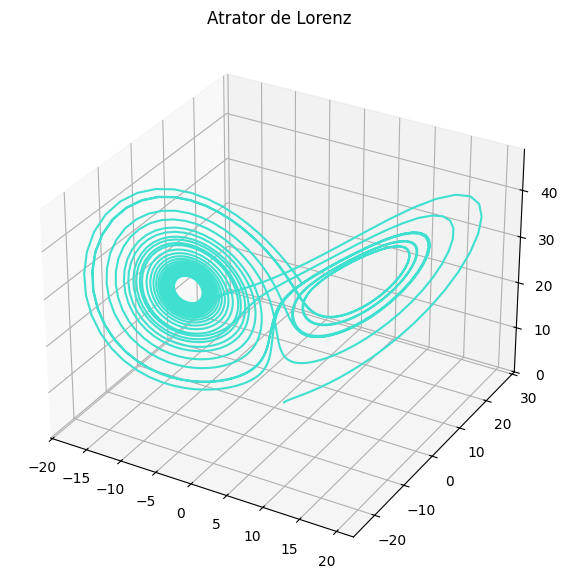

In [ ]:
# Parâmetros do sistema
sigma = 10
rho = 28
beta = 8/3

# Condição inicial
r0 = [1,1,1]

# Vetor temporal
tempos = np.linspace(0, 25, 2000)

sol = odeint(lorenz, r0, tempos, args = (sigma,rho, beta))


# Plotagem
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], color="turquoise")
ax.set_title("Atrator de Lorenz")
plt.show()

$\quad$ A melhor forma de se entender o comportamento das variáveis no espaço de fase é visualizando a sua trajetória através de uma animação. Assim, faremos o seguinte: plotemos a evolução total de uma dada trajetória cxom condição inicialq qualquer; em seguida escolhemos um conjunto de pontos com determinada condição inicial, com pequenas variáveis entre a posição inicial de cada ponto; plotemos não a trajetória total desse conjunto de pontos de uma só vez, mas evoluiremos sua trajetória (demarcando a sua posição atual por um ponto) de tempo em tempo.  

In [6]:
tempos = np.linspace(0, 25, 1500)

epsilon = 10e-4
r_inicial = np.array([0,0,0], float)
r_iniciais = np.array([r_inicial, r_inicial+epsilon, r_inicial+2*epsilon, r_inicial+3*epsilon], float)
solucoes = []
for r0 in r_iniciais:
    sol = odeint(lorenz, r0, tempos, args = (sigma, rho, beta))
    solucoes.append(sol)

fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

def atualizar(frame_idx):
    ax.clear()  # Limpa o gráfico a cada frame
    ax.set_title(f'Atrator de Lorenz - {frame_idx/len(tempos)*100:.2f}%', )
    
    elev = 30
    azim = (frame_idx * 0.5) % 360  # gira lentamente em torno do eixo vertical
    ax.view_init(elev=elev, azim=azim)
    
    sol0 = solucoes[1]
    ax.plot(sol0[:,0], sol0[:, 1], sol0[:, 2], color="red")
    for sol in solucoes:        
        # Ponto atual (preto)
        x, y, z = sol[frame_idx]
        ax.scatter(x, y, z, color='black', s=10)

ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=50)
plt.close(fig)
ani.save('Lorenz.gif', writer='pillow')


## Atrator de Rossler

$\quad$ Inicialmente estudado por Otto Rossler nos anos 1970, o Atrator de Rossler surge no contexto de um sistema de 3 EDOs, no chamado sistema de Rossler. O atrator presente nesse espaço de fase tem certas similaridades com o atrator de lorenz, mas é consideravelmente mais simple do que o mesmo. Por essa simplicidade, algumas de suas propriedades, como pontos fixos, podem ser estudados por meio de ferramentadas da própria algebra linear, fato que não será aqui abordado. Assim como no caso anteior do atrator de lorenz, simularemos a trajetória de condiçoes iniciais próximas no espaço de fase do sistema de Rossler.   

$$
\frac{dx}{dt} = -(y+z), \quad \frac{dy}{dt} =x+ay\quad \text{e} \quad \frac{dz}{dt} = b+z(x-c).
$$

In [ ]:
def rossler(r, t, a, b, c):
    x, y, z = r[0], r[1], r[2]  
    dx = -(y+z)
    dy = x+a*y
    dz = b+z*(x-c)
    return [dx, dy, dz]

$\quad$ 

In [ ]:
a, b, c = 0.2, 0.2, 5.7
epsilon = 10e-2
r_inicial = np.array([1,1,1], float)
N = 10
r_iniciais = np.array([r_inicial], float)
for n in range(N):
    r_iniciais = np.vstack([r_iniciais, r_inicial+(n+1)*epsilon])

solucoes = []
tempos = np.linspace(0, 25, 1000)
for r0 in r_iniciais:
    sol = odeint(rossler, r0, tempos, args = (a, b, c))
    solucoes.append(sol)

fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

tmps0 = np.linspace(0, 50, 2000)
r0_1 = [2,2,2]
sol_0 = odeint(rossler, r0_1, tmps0, args = (a, b, c))

def atualizar(frame_idx):
    ax.clear()  # Limpa o gráfico a cada frame
    ax.set_title(f'Atrator de Rossler - {frame_idx/len(tempos)*100:.2f}%', )
    
    elev = 30
    azim = (frame_idx * 0.5) % 360  # gira lentamente em torno do eixo vertical
    ax.view_init(elev=elev, azim=azim)
    
    ax.plot(sol_0[:,0], sol_0[:, 1], sol_0[:, 2], color="blue")
    
    for sol in solucoes:        
        # Ponto atual (preto)
        x, y, z = sol[frame_idx]
        ax.scatter(x, y, z, color='black', s=10)


ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=50)
plt.close(fig)
ani.save('Rossler.gif', writer='pillow')

## _Atrator do Pendulo Físico_

$$
\frac{dx}{dt} = y \quad \text{e} \quad \frac{dy}{dt} = -\gamma - \omega_{0}^{2}\sin{x}.
$$

In [ ]:
# Parâmetros físicos
gamma = 0.5        # Coeficiente de amortecimento
omega0 = 1.0       # Frequência natural do pêndulo

# Sistema de equações diferenciais
def pendulo_fisico(t, z):
    theta, omega = z
    dtheta_dt = omega
    domega_dt = -gamma * omega - omega0**2 * np.sin(theta)
    return [dtheta_dt, domega_dt]

## Atrator de Langford

$$
\frac{dx}{dt} = (z-b)x-yd, \quad \frac{dy}{dt} = xd+(z-b)y \quad \text{e} \quad \frac{dz}{dt} = c+az-\frac{z^3}{3} - (x^2+y^2)(1+ez)+fzx^3.
$$

In [38]:
def langford(r, t, a, b, c, d, e, f):
    x, y, z = r[0], r[1], r[2]  
    dx = (z-b)*x - d*y
    dy = x*d+(z-b)*y
    dz = c + (a*z) - (z**3/3) - (x**2+y**2)*(1+e*z)+f*z*x**3
    return [dx, dy, dz]

Plotando a trajetória tudo + animação pontual

In [ ]:
a, b, c, d, e, f = 0.95, 0.7, 0.6, 3.5, 0.25, 0.1

epsilon = 10e-4
r_inicial = np.array([0,0,0], float)
r_iniciais = np.array([r_inicial, r_inicial+epsilon, r_inicial+2*epsilon, r_inicial+3*epsilon], float)
solucoes = []
for r0 in r_iniciais:
    sol = odeint(langford, r0, tempos, args = (a, b, c, d, e, f))
    solucoes.append(sol)

fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

def atualizar(frame_idx):
    ax.clear()  # Limpa o gráfico a cada frame
    ax.set_title(f'Atrator de Langford - {frame_idx/len(tempos)*100:.2f}%', )
    
    elev = 30
    azim = (frame_idx * 0.5) % 360  # gira lentamente em torno do eixo vertical
    ax.view_init(elev=elev, azim=azim)
    
    sol0 = solucoes[1]
    ax.plot(sol0[:,0], sol0[:, 1], sol0[:, 2], color="red")
    for sol in solucoes:        
        # Ponto atual (preto)
        x, y, z = sol[frame_idx]
        ax.scatter(x, y, z, color='black', s=10)

ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=50)
plt.close(fig)
ani.save('Langford.gif', writer='pillow')

## Multiscroll Attractor 

$\quad$ Também conhecido como o Atrator de Chua, o Double-Scroll Attractor tem sua origem num circuito eletrônico caótico com um resistor não linear simples, o denominado circuito de Chua. Tal circuito é um sistema decrito por 3 EDOs, sendo elas:

$$
\frac{dx}{dt} = a(y-x), \quad \frac{dy}{dt} = (c-a)x - xz + cy \quad \text{e} \quad \frac{dz}{dt} = xy - bz.
$$

In [7]:
def chua(r, t, a, b, c):
    x, y, z = r[0], r[1], r[2]  
    dx = a*(y-x)
    dy = (c-a)*x - x*z + c*y
    dz = x*y - b*z
    return [dx, dy, dz]

In [ ]:
a, b, c = 40, 28, 3

epsilon = 10e-4
r_inicial = np.array([1,1,1], float)
r_iniciais = np.array([r_inicial, r_inicial+epsilon, r_inicial+2*epsilon, r_inicial+3*epsilon], float)
solucoes = []
for r0 in r_iniciais:
    sol = odeint(chua, r0, tempos, args = (a, b, c))
    solucoes.append(sol)

fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

def atualizar(frame_idx):
    ax.clear()  # Limpa o gráfico a cada frame
    ax.set_title(f'Atrator de Chua - {frame_idx/len(tempos)*100:.2f}%', )
    
    elev = 30
    azim = (frame_idx * 0.5) % 360  # gira lentamente em torno do eixo vertical
    ax.view_init(elev=elev, azim=azim)
    
    sol0 = solucoes[1]
    ax.plot(sol0[:,0], sol0[:, 1], sol0[:, 2], color="red")
    for sol in solucoes:        
        # Ponto atual (preto)
        x, y, z = sol[frame_idx]
        ax.scatter(x, y, z, color='black', s=10)

ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=50)
plt.close(fig)
ani.save('Chua.gif', writer='pillow')

## Hénon Map

In [ ]:
def henon_map(xn,yn, a, b):
    xn_p1 = 1 - a*xn**2 + yn
    yn_p1 = b*xn
    return np.array([xn_p1, yn_p1], float)

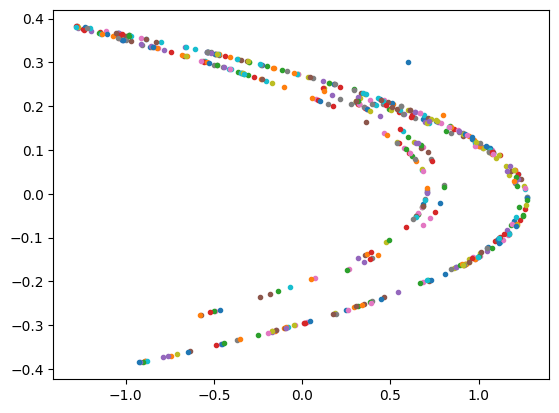

In [ ]:
a, b = 1.4, 0.3


r0 = np.array([1,1], float)

xs = [r0[0]]
ys = [r0[1]]

N = 500

for n in range(N):
    r0 = henon_map(r0[0], r0[1], a, b)    
    plt.plot(r0[0], r0[1], marker='o', linestyle='', markersize=3)
plt.show()



# Referências